# PRODIGY_ML_04

In [6]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [7]:
!kaggle kernels pull tyronehou/starter-hand-gesture-recognition-83de003b-5

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
import pandas as pd

# Define the paths to the CSV files
train_file_path = '/content/sample_data/california_housing_train.csv'
test_file_path = '/content/sample_data/california_housing_test.csv'

# Load the data
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the training data
print(train_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


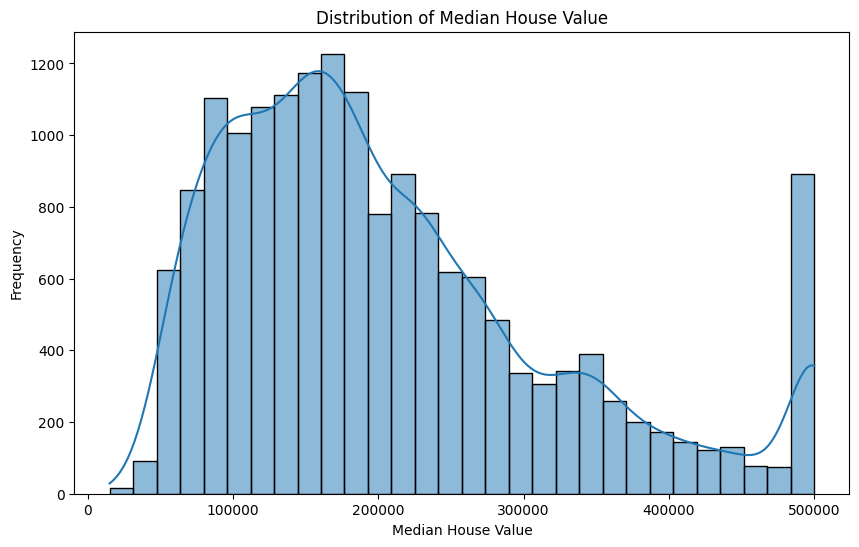

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of median house value
plt.figure(figsize=(10, 6))
sns.histplot(train_data['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


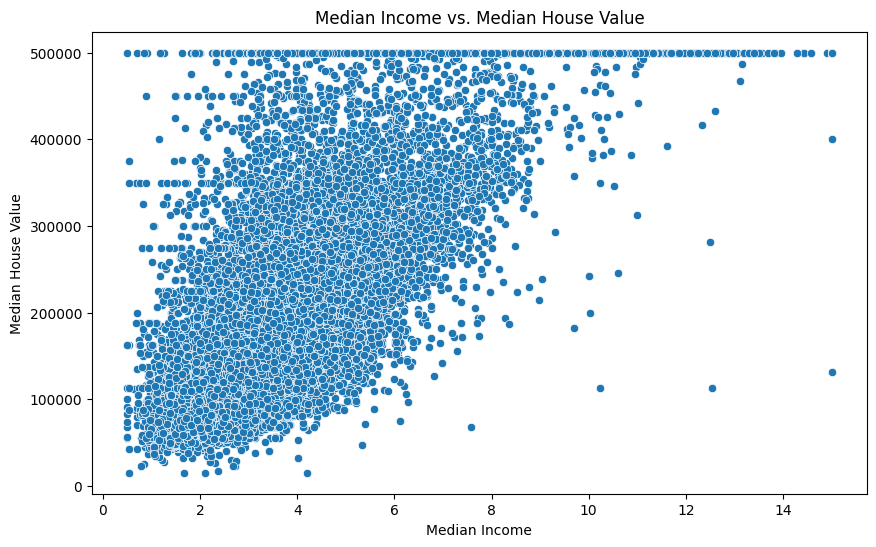

In [10]:
# Scatter plot of median income vs. median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=train_data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


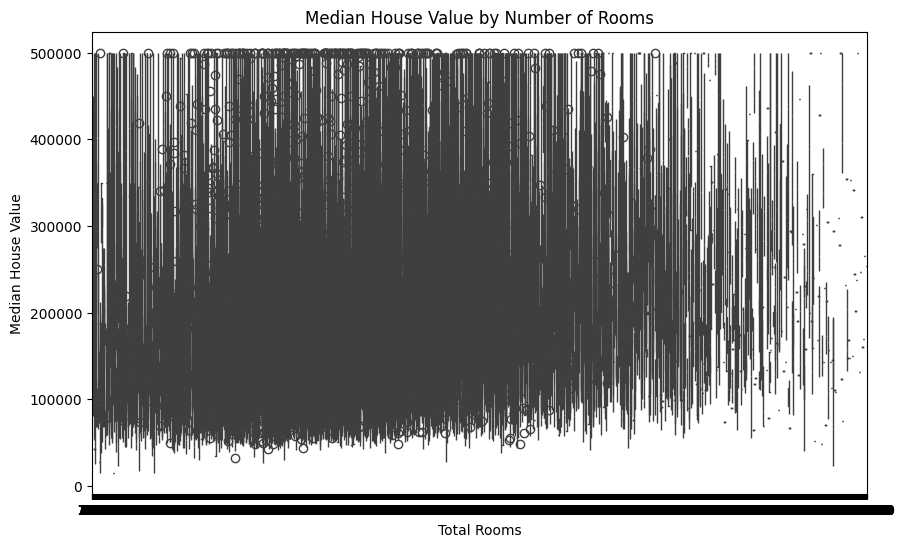

In [5]:
# Box plot of median house value by number of rooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_rooms', y='median_house_value', data=train_data)
plt.title('Median House Value by Number of Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()


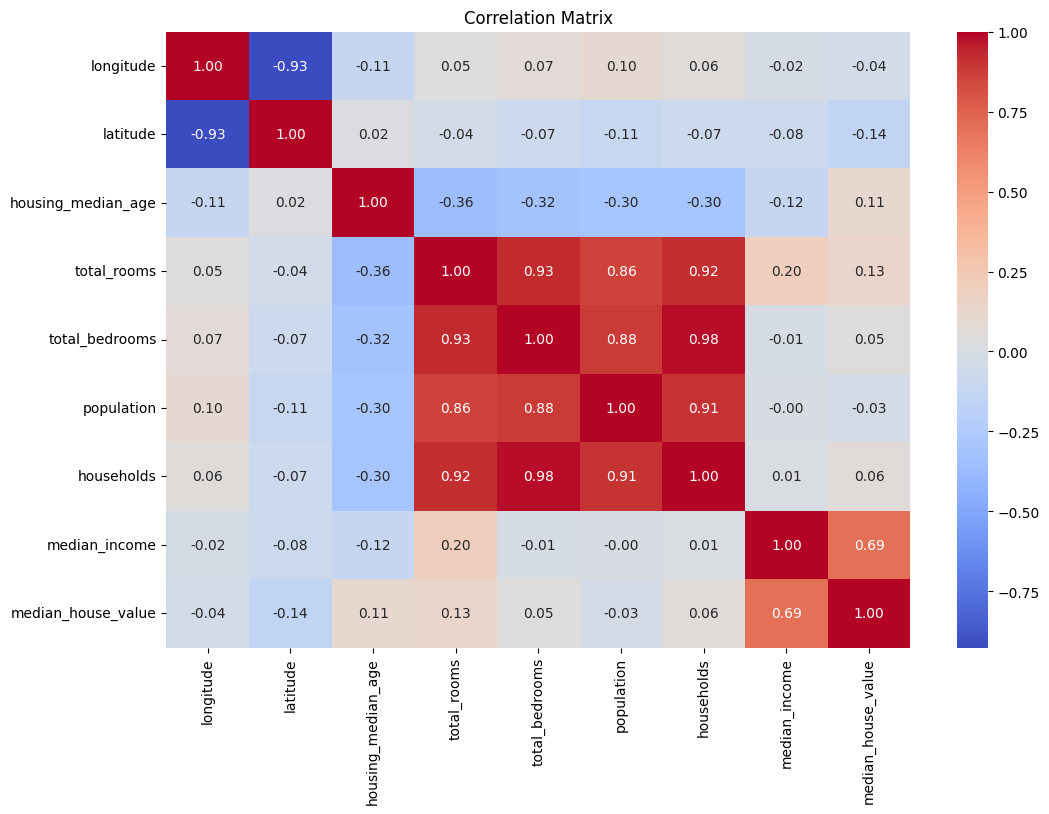

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Select features for the model
features = ['median_income', 'total_rooms', 'housing_median_age']
X = train_data[features]
y = train_data['median_house_value']

In [13]:
# Handle missing values by filling them with the median
X = X.fillna(X.median())
test_data = test_data.fillna(test_data.median())

# Train/test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Validation RMSE: {rmse}')

# Prepare the test data
X_test = test_data[features].fillna(test_data[features].median())

# Make predictions on the test data
test_predictions = model.predict(X_test)

# Display the first few predictions
print(test_predictions[:10])

Validation RMSE: 79418.21928429989
[323758.43614663 218535.66540193 288183.34831379 291427.49220208
 143173.9059443  123253.53880315 134840.98303453 159329.30512818
 173279.28110519 145157.56096343]
